In [16]:
from pathlib import Path
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import sqlite3

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [10]:
notebook_path = Path().resolve()
root_dir = notebook_path.parent
db_file = root_dir / "db.sqlite3"

conn = sqlite3.connect(db_file)

query = '''
    SELECT ro.datetime, roi.order_id, roi.product_id, rp.name as product_name, roi.quantity, rp.price
    FROM restaurant_orderitem AS roi
    INNER JOIN restaurant_order AS ro ON roi.order_id = ro.id
    INNER JOIN restaurant_product AS rp ON roi.product_id = rp.id
'''

df = pd.read_sql_query(query, conn)

conn.close()

df.to_csv("restaurant.csv", index=False)

In [11]:
df

,datetime,order_id,product_id,product_name,quantity,price
0,2019-08-03 20:25:00,1,6,Plain Papadum,2,0.80
1,2019-08-03 20:25:00,1,240,King Prawn Balti,1,12.95
2,2019-08-03 20:25:00,1,19,Garlic Naan,1,2.95
3,2019-08-03 20:25:00,1,36,Mushroom Rice,1,3.95
4,2019-08-03 20:25:00,1,111,Paneer Tikka Masala,1,8.95
...,...,...,...,...,...,...
74813,2016-05-18 18:53:00,3255,247,House Red wine 75cl,2,17.95
74814,2016-05-14 19:28:00,12905,247,House Red wine 75cl,2,17.95
74815,2016-05-10 13:18:00,3272,247,House Red wine 75cl,2,17.95
74816,2016-04-07 19:04:00,11404,248,House white wine 75cl,1,17.95


# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

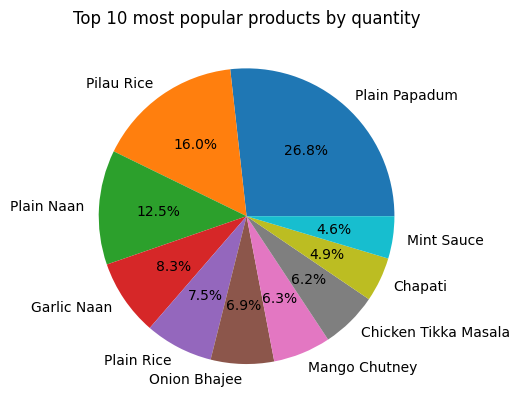

In [20]:
top_10_products = df.groupby("product_name")["quantity"].sum().sort_values(ascending=False)[:10]

fig, ax = plt.subplots()
ax.pie(top_10_products, labels=top_10_products.index, autopct="%1.1f%%")
ax.set_title("Top 10 most popular products by quantity")
plt.show()

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

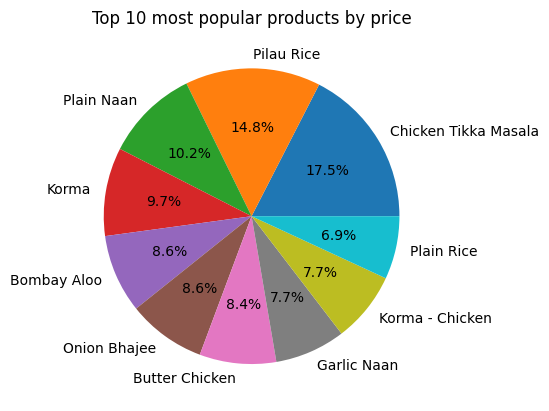

In [24]:
df["item_price"] = df["price"] * df["quantity"]

top_10_products = df.groupby("product_name")["item_price"].sum().sort_values(ascending=False)[:10]

fig, ax = plt.subplots()
ax.pie(top_10_products, labels=top_10_products.index, autopct="%1.1f%%")
ax.set_title("Top 10 most popular products by price")
plt.show()

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

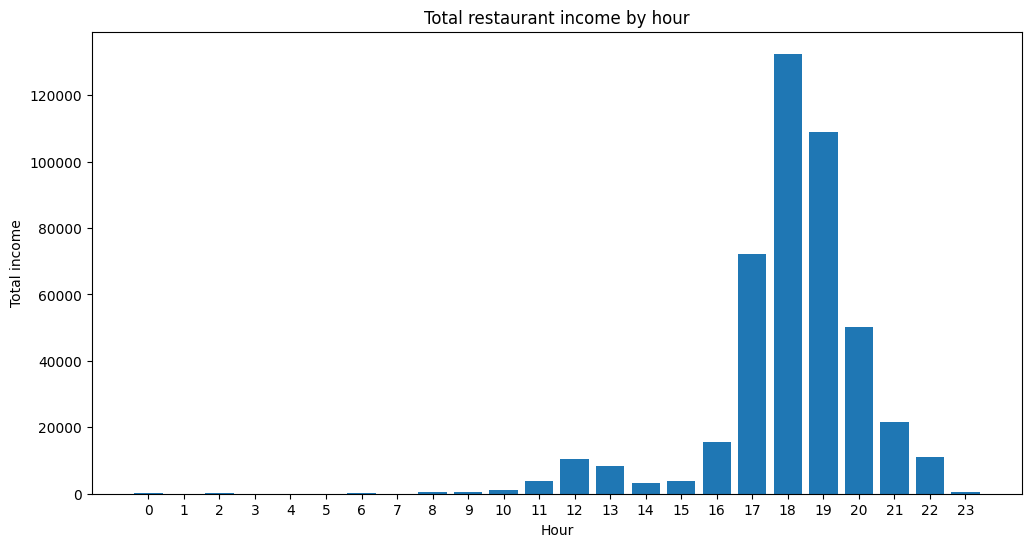

In [46]:
df["datetime"] = pd.to_datetime(df["datetime"])
df["order_hour"] = df["datetime"].dt.hour
income_by_hour = df.groupby("order_hour")["item_price"].sum()

fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
ax.bar(income_by_hour.index, income_by_hour)
ax.set_title("Total restaurant income by hour")
ax.set_xlabel("Hour")
ax.set_ylabel("Total income")
ax.set_xticks(np.arange(24))
plt.show()

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

In [52]:
df["order_day"] = df["datetime"].dt.day_name()
income_by_day = df.groupby("order_day")["item_price"].sum().sort_values(ascending=True)

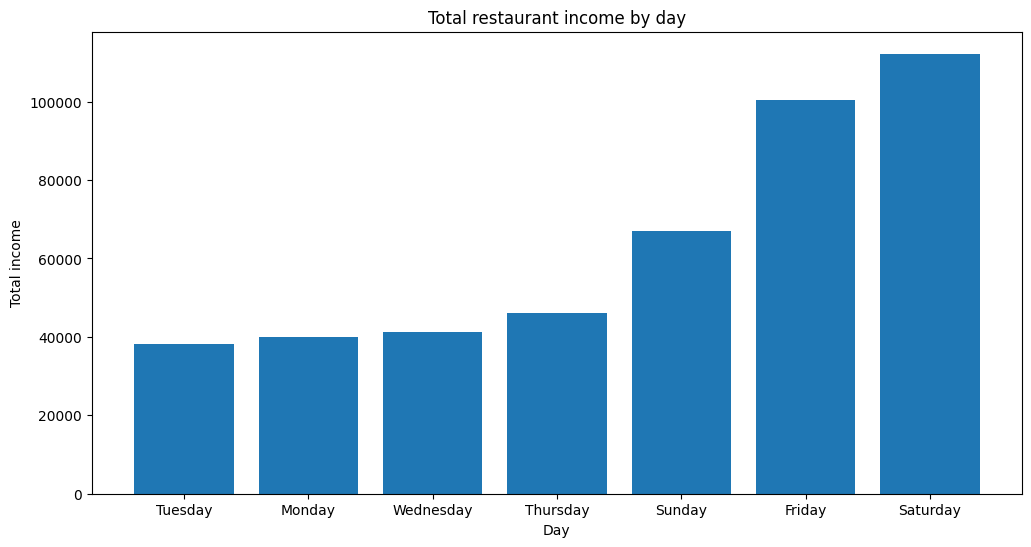

In [53]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
ax.bar(income_by_day.index, income_by_day)
ax.set_title("Total restaurant income by day")
ax.set_xlabel("Day")
ax.set_ylabel("Total income")
ax.set_xticks(np.arange(7))
plt.show()